# importing Data

In [1]:
import pandas as pd
import numpy as np
# Load the data
data = pd.read_csv("cardio_train.csv", delimiter=';')
type(data)


pandas.core.frame.DataFrame

In [2]:
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.shape

(70000, 13)

In [4]:
data.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60347,86163,22468,1,153,77.0,130,80,3,1,0,0,1,1
7703,10999,21283,1,151,81.0,140,80,1,2,0,0,1,1
47547,67900,18885,2,168,94.0,120,90,2,1,0,0,1,0
35143,50217,17501,2,178,130.0,120,80,1,1,0,0,0,1
24658,35212,20502,1,169,62.0,120,80,1,1,0,0,1,0


## cleaning and understanding our dataset

In [5]:
print(data['cholesterol'].unique())
data['cardio'].nunique()

[1 3 2]


2

In [6]:
data.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

### unique values are mainly high in age,height,weight,ap_hi,ap_lo

In [7]:
data.drop("id",axis=1,inplace=True)


In [8]:
data.duplicated().sum()

24

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
info = ["age in days","Gender | 1: female, 2: male","Height","Weight","Systolic blood pressure","Diastolic blood pressure","Cholesterol | type-1: normal, 2: above normal, 3: well above normal|","Glucose | type-- 1: normal, 2: above normal, 3: well above normal |","Smoking ","Alcohol intake ","Physical activity","Presence or absence of cardiovascular disease"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age in days
gender:			Gender | 1: female, 2: male
height:			Height
weight:			Weight
ap_hi:			Systolic blood pressure
ap_lo:			Diastolic blood pressure
cholesterol:			Cholesterol | type-1: normal, 2: above normal, 3: well above normal|
gluc:			Glucose | type-- 1: normal, 2: above normal, 3: well above normal |
smoke:			Smoking 
alco:			Alcohol intake 
active:			Physical activity
cardio:			Presence or absence of cardiovascular disease


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69976 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69976 non-null  int64  
 1   gender       69976 non-null  int64  
 2   height       69976 non-null  int64  
 3   weight       69976 non-null  float64
 4   ap_hi        69976 non-null  int64  
 5   ap_lo        69976 non-null  int64  
 6   cholesterol  69976 non-null  int64  
 7   gluc         69976 non-null  int64  
 8   smoke        69976 non-null  int64  
 9   alco         69976 non-null  int64  
 10  active       69976 non-null  int64  
 11  cardio       69976 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [12]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# thankfuly no nan values

In [13]:
data['cholesterol'].value_counts()

1    52361
2     9549
3     8066
Name: cholesterol, dtype: int64

In [14]:
len(data)

69976

In [15]:
# Convert age from days to years
data['age'] = (data['age'] / 365).round().astype(int)
data.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
data['weight'].min()

10.0

In [17]:
data['weight'].max()

200.0

In [18]:
data['height'].min()

55

In [19]:
data['height'].max()

250

### check for outliers

<Figure size 9360x5760 with 0 Axes>

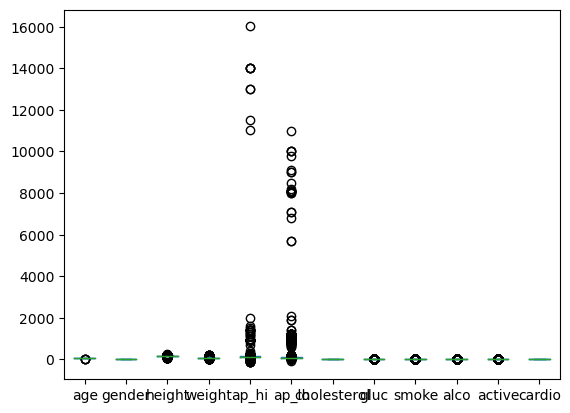

In [20]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(10.4, 6.4), dpi=900, facecolor='w', edgecolor='k')
data.plot(kind='box')
plt.show();

### In addition, in some cases diastolic pressure is higher than systolic, which is also incorrect. How many records are inaccurate in terms of blood pressure?

In [21]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1234 cases


In [22]:
data[data['ap_lo']> data['ap_hi']].shape[0]

1234

### Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [23]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)

In [24]:
data[data['ap_lo']> data['ap_hi']].shape[0]

0

<Figure size 9360x5760 with 0 Axes>

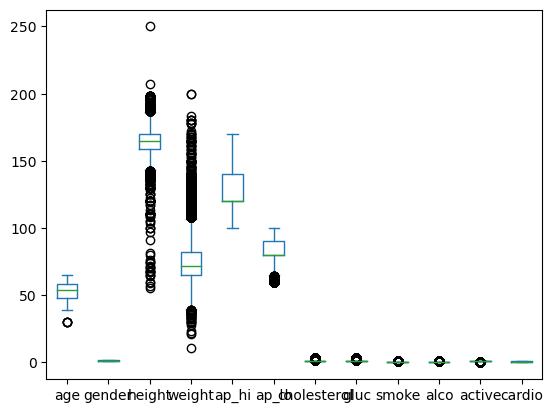

In [25]:
plt.figure(num=None, figsize=(10.4, 6.4), dpi=900, facecolor='w', edgecolor='k')
data.plot(kind='box')
plt.show();

### Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.

In [26]:
data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

In [27]:
(data['height'] > 150).value_counts()

True     59796
False      836
Name: height, dtype: int64

<Figure size 9360x5760 with 0 Axes>

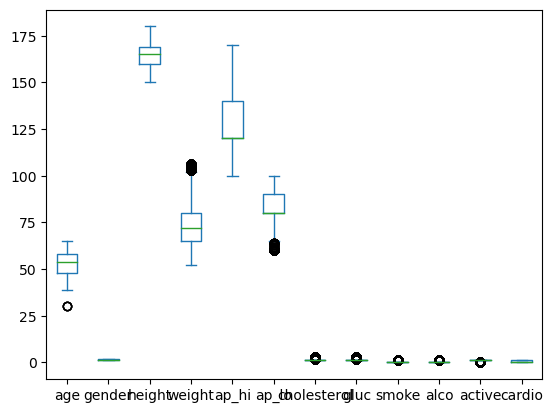

In [28]:
plt.figure(num=None, figsize=(10.4, 6.4), dpi=900, facecolor='w', edgecolor='k')
data.plot(kind='box')
plt.show();

In [29]:
data['height'].max()

180

In [30]:
data['height'].min()

150

In [31]:
data['weight'].max()

106.0

In [32]:
data['weight'].min()

52.0

In [33]:
len(data)

60632

In [34]:
len(data)

60632

In [35]:
data['weight'].value_counts()

65.0    3647
70.0    3530
68.0    2651
60.0    2544
75.0    2542
        ... 
83.6       1
73.8       1
57.4       1
70.8       1
99.9       1
Name: weight, Length: 160, dtype: int64

In [36]:
print('Maximum age variable:',data["age"].max())
print('Minimum age variable:',data["age"].min())
print(f'Number of age variables:',data["age"].nunique())

Maximum age variable: 65
Minimum age variable: 30
Number of age variables: 28


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60632 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          60632 non-null  int32  
 1   gender       60632 non-null  int64  
 2   height       60632 non-null  int64  
 3   weight       60632 non-null  float64
 4   ap_hi        60632 non-null  int64  
 5   ap_lo        60632 non-null  int64  
 6   cholesterol  60632 non-null  int64  
 7   gluc         60632 non-null  int64  
 8   smoke        60632 non-null  int64  
 9   alco         60632 non-null  int64  
 10  active       60632 non-null  int64  
 11  cardio       60632 non-null  int64  
dtypes: float64(1), int32(1), int64(10)
memory usage: 5.8 MB


In [38]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000
mean,53.360882,1.347820,164.553206,73.476595,126.143934,81.146507,1.353493,1.220758,0.085714,0.052101,0.803619,0.491589
std,6.745516,0.476282,6.834182,11.635494,14.281163,8.313775,0.671762,0.567900,0.279943,0.222233,0.397264,0.499933
min,30.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,169.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,180.000000,106.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Analysing the 'target' variable

In [39]:
data["cardio"].describe()

count    60632.000000
mean         0.491589
std          0.499933
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cardio, dtype: float64

In [40]:
data["cardio"].unique()

array([0, 1], dtype=int64)

##### Clearly, this is a classification problem, with the target variable having values '0' and '1'

In [41]:
print(data.corr()["cardio"].abs().sort_values(ascending=False))


cardio         1.000000
ap_hi          0.429485
ap_lo          0.325509
age            0.237895
cholesterol    0.216716
weight         0.159087
gluc           0.085459
active         0.038255
height         0.030822
smoke          0.023073
alco           0.013944
gender         0.004649
Name: cardio, dtype: float64


In [42]:
#check for correlation among the numerical columns
correlation = data.select_dtypes('number').corr()
correlation

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.024054,-0.082308,0.064792,0.204785,0.149119,0.152184,0.096681,-0.047457,-0.028364,-0.011866,0.237895
gender,-0.024054,1.000000,0.502222,0.128268,0.044746,0.049564,-0.041900,-0.024547,0.336759,0.168638,0.007190,-0.004649
height,-0.082308,0.502222,1.000000,0.247727,-0.011315,0.006724,-0.069081,-0.030256,0.185227,0.088510,-0.005467,-0.030822
weight,0.064792,0.128268,0.247727,1.000000,0.232737,0.214386,0.130136,0.088163,0.055633,0.057266,-0.011660,0.159087
ap_hi,0.204785,0.044746,-0.011315,0.232737,1.000000,0.695403,0.189174,0.081405,0.020289,0.025237,0.002750,0.429485
ap_lo,0.149119,0.049564,0.006724,0.214386,0.695403,1.000000,0.150004,0.061119,0.018720,0.027345,0.000951,0.325509
cholesterol,0.152184,-0.041900,-0.069081,0.130136,0.189174,0.150004,1.000000,0.452933,0.004727,0.027102,0.007604,0.216716
gluc,0.096681,-0.024547,-0.030256,0.088163,0.081405,0.061119,0.452933,1.000000,-0.010300,0.003610,-0.007196,0.085459
smoke,-0.047457,0.336759,0.185227,0.055633,0.020289,0.018720,0.004727,-0.010300,1.000000,0.342319,0.026783,-0.023073
alco,-0.028364,0.168638,0.088510,0.057266,0.025237,0.027345,0.027102,0.003610,0.342319,1.000000,0.025850,-0.013944


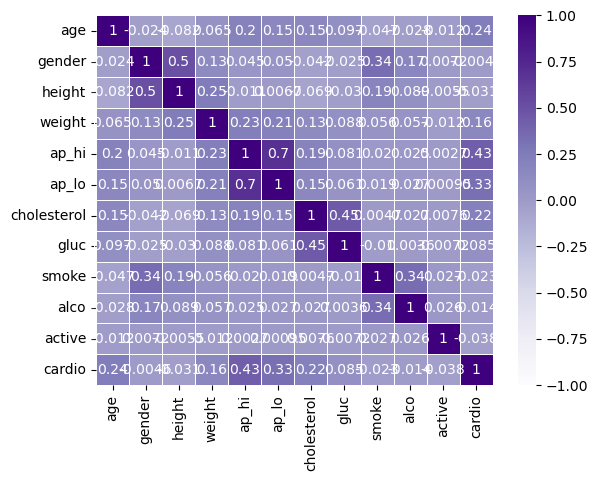

In [43]:
import seaborn as sns
#visualise the correlation
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, cmap='Purples', linewidth=0.5);

# analysing

## EDA

0    30826
1    29806
Name: cardio, dtype: int64


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


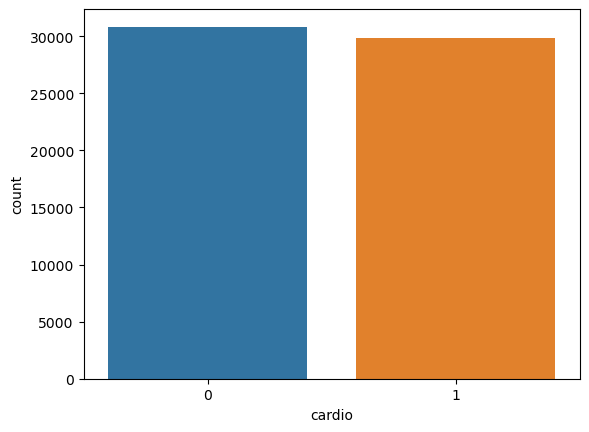

In [44]:


y = data["cardio"]
sns.countplot(y)

target_temp = data.cardio.value_counts()
print(target_temp)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='cardio'>

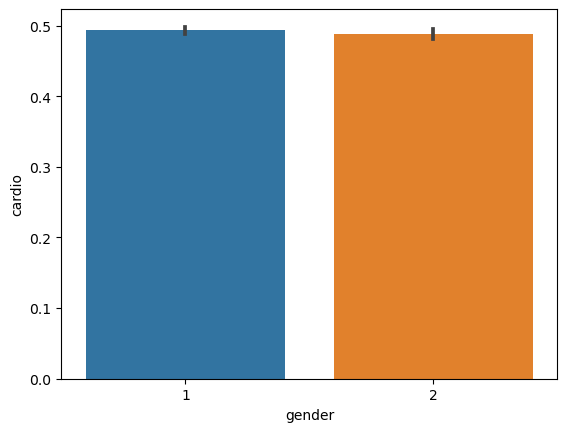

In [45]:
sns.barplot(data["gender"],y)

<AxesSubplot:xlabel='cardio', ylabel='count'>

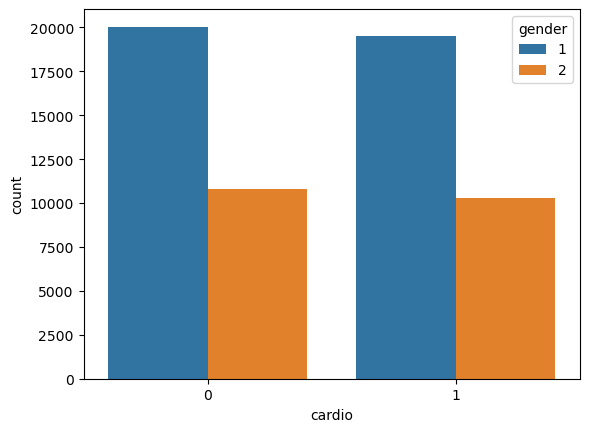

In [46]:
sns.countplot(x='cardio',hue='gender',data=data)

<AxesSubplot:xlabel='cholesterol', ylabel='cardio'>

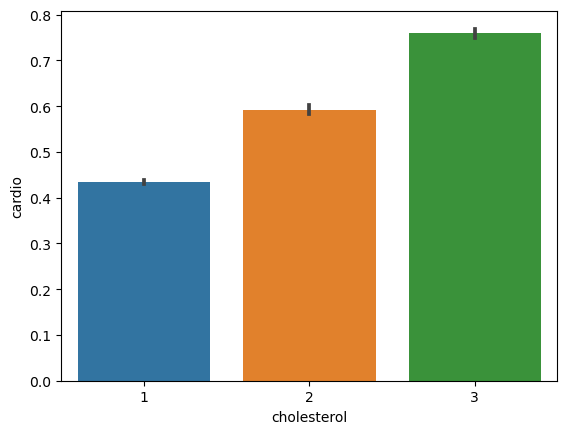

In [47]:
sns.barplot(data=data,x="cholesterol", y="cardio")
# plt.show()

In [48]:
value_counts = data.groupby(["cholesterol", "cardio"]).size()

print(value_counts)

cholesterol  cardio
1            0         25967
             1         19984
2            0          3234
             1          4695
3            0          1625
             1          5127
dtype: int64


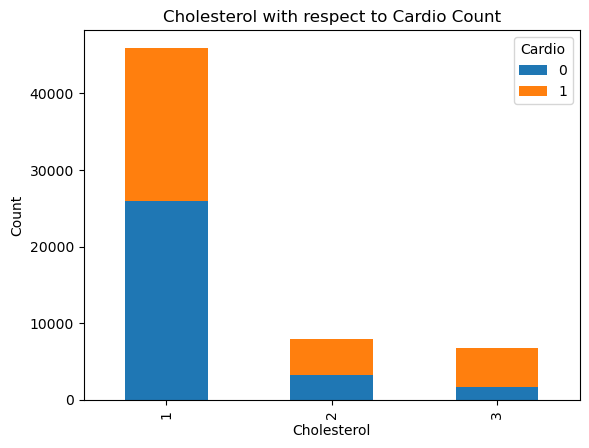

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the value count of "cardio" for each unique "cholesterol" value
value_counts = data.groupby("cholesterol")["cardio"].value_counts().unstack()

# Plot the value counts
ax = value_counts.plot(kind="bar", stacked=True)

# Customize the plot
ax.set_xlabel("Cholesterol")
ax.set_ylabel("Count")
ax.set_title("Cholesterol with respect to Cardio Count")
plt.legend(title="Cardio", loc="upper right")

# Display the plot
plt.show()

<AxesSubplot:xlabel='gluc', ylabel='cardio'>

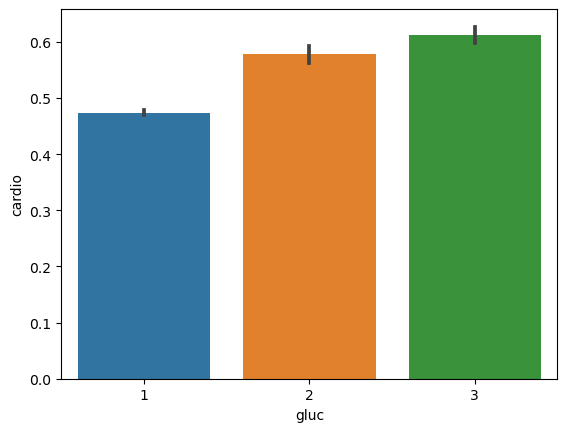

In [50]:
sns.barplot(data=data,x="gluc", y="cardio")
# plt.show()

<AxesSubplot:xlabel='smoke', ylabel='cardio'>

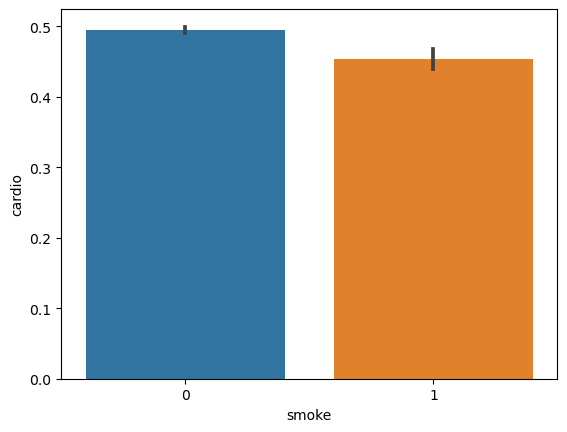

In [51]:
sns.barplot(data=data,x="smoke", y="cardio")
# plt.show()

<AxesSubplot:xlabel='alco', ylabel='cardio'>

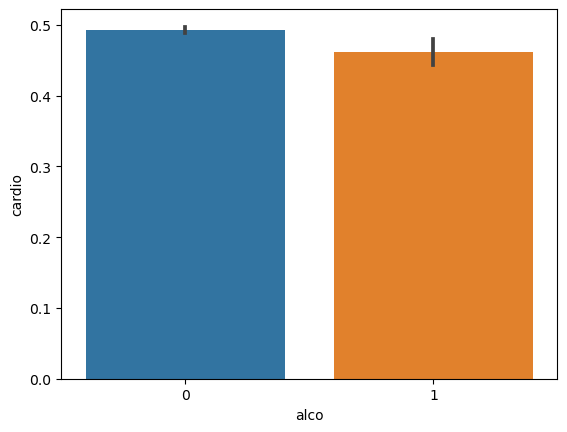

In [52]:
sns.barplot(data=data,x="alco", y="cardio")
# plt.show()

In [53]:
data.groupby('gender')['alco'].sum()

gender
1     978
2    2181
Name: alco, dtype: int64

<AxesSubplot:xlabel='active', ylabel='cardio'>

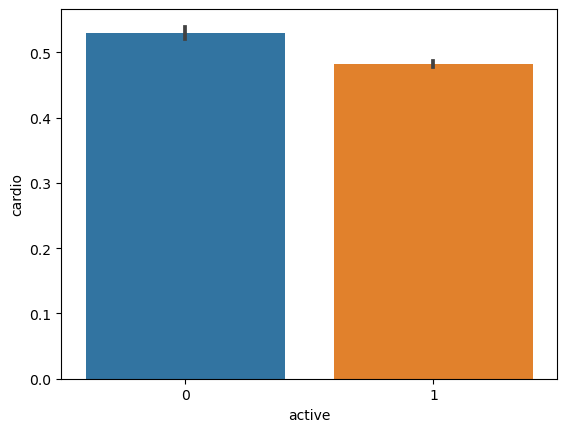

In [54]:
sns.barplot(data=data,x="active", y="cardio")
# plt.show()

<AxesSubplot:ylabel='Frequency'>

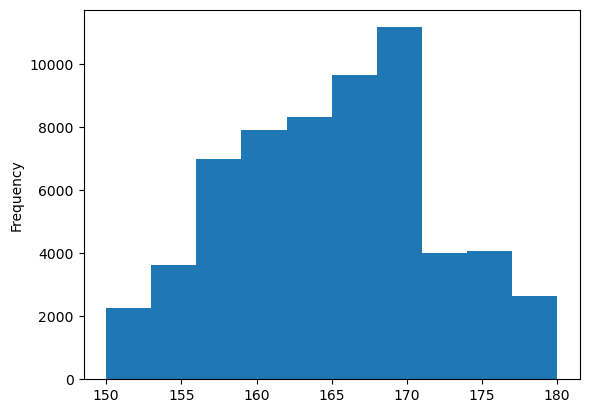

In [55]:
data['height'].plot.hist()#automaticaly count is taken

<AxesSubplot:ylabel='Frequency'>

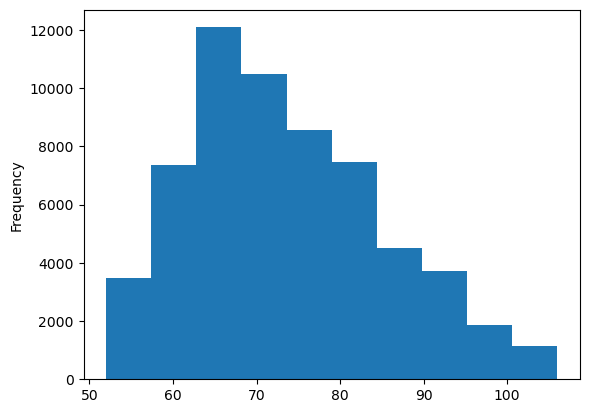

In [56]:
data['weight'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

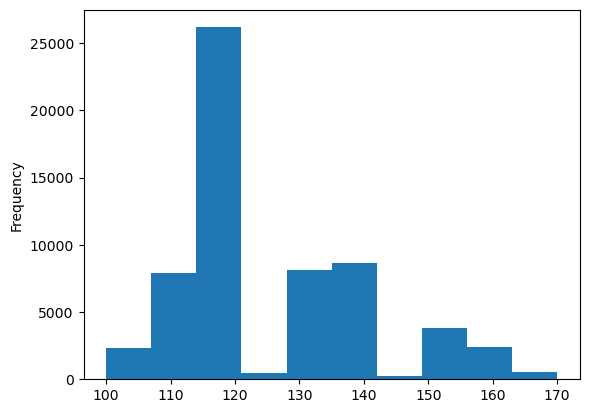

In [57]:
data['ap_hi'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

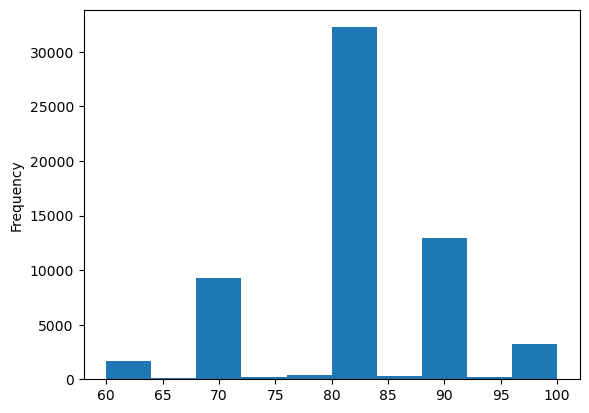

In [58]:
data['ap_lo'].plot.hist()

In [59]:
data['BMI'] = data['weight']/((data['height']/100)**2)

In [60]:
data.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [61]:
data.drop(['height','weight'],axis=1,inplace=True)

<AxesSubplot:ylabel='Frequency'>

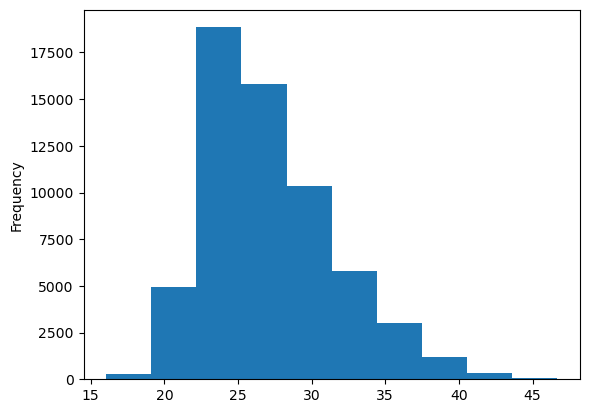

In [62]:
data['BMI'].plot.hist()

Diastilic pressure is higher than systolic one in 0 cases


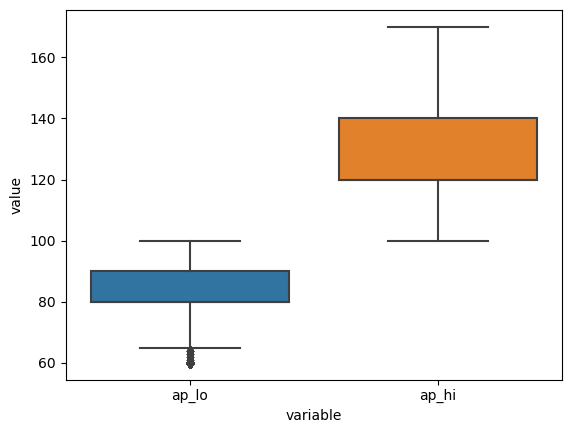

In [63]:
blood_pressure = data.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

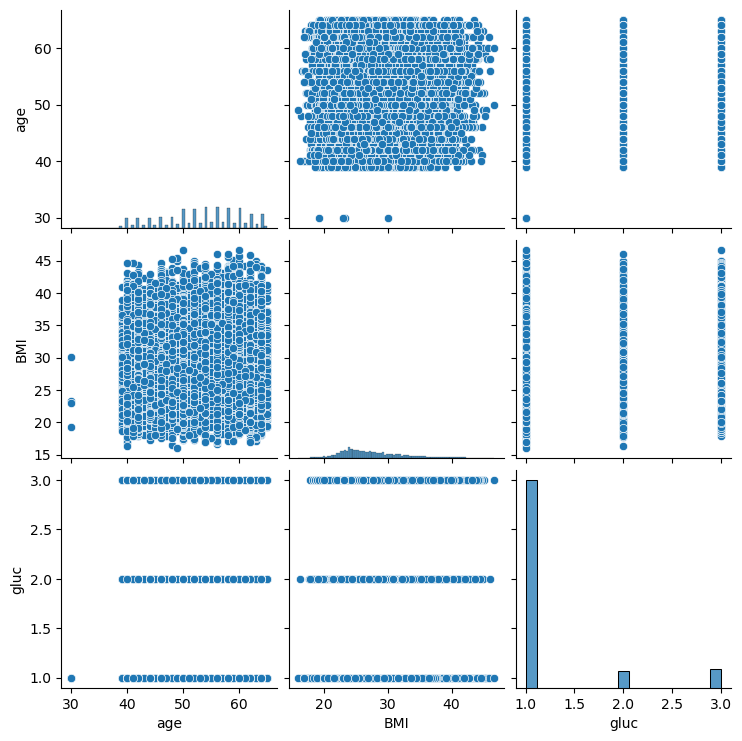

In [64]:
#Visualize the relationships among age, bmi and avg_glucose_level
columns= ['age', 'BMI', 'gluc']
sns.pairplot(data[columns])
plt.show()

In [65]:
print(data.corr()["cardio"].abs().sort_values(ascending=False))

cardio         1.000000
ap_hi          0.429485
ap_lo          0.325509
age            0.237895
cholesterol    0.216716
BMI            0.172966
gluc           0.085459
active         0.038255
smoke          0.023073
alco           0.013944
gender         0.004649
Name: cardio, dtype: float64


In [66]:
# # One-hot encode categorical variables
# data = pd.get_dummies(data, columns=[ 'cholesterol'])
# data

In [67]:
data = pd.get_dummies(data, columns=['cholesterol', 'gluc'], drop_first=True)

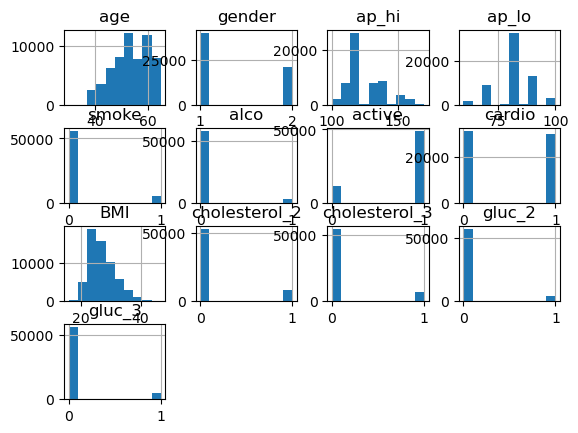

In [68]:
data.hist();

# IV. Train Test split

In [69]:
# Split into features and labels
x = data.drop(['cardio'], axis=1)
y = data['cardio']

In [70]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [71]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [72]:

x_test.shape
x_train.shape

(45474, 12)

In [73]:
y_train.shape
y_test.shape

(15158,)

# logistic regression

In [74]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 72.2 %


# SVM

In [77]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
# from sklearn.svm import SVC
# sv = SVC()
sv.fit(x_train, y_train)

y_pred_svm = sv.predict(x_test)

In [78]:
y_pred_svm.shape

(15158,)

In [79]:
acc_svc = round(sv.score(x_train,y_train) * 100, 2)
acc_svc

72.17

In [80]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 72.05 %


# K Nearest Neighbors

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [82]:
y_pred_knn.shape

(15158,)

In [83]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 70.0 %


# Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

y_pred_nb = nb.predict(x_test)

In [85]:
y_pred_nb.shape

(15158,)

In [86]:
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 69.78 %


# Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    y_pred_dt = dt.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [88]:
print(y_pred_dt.shape)

(15158,)


In [89]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 63.93 %
